In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn

from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFpr, chi2, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.impute import  SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.classifier import StackingCVClassifier

from tqdm import tqdm,trange
from collections import defaultdict,Counter
from text_to_num import text2num,alpha2digit
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

import os
import re
import time
import pickle
import scipy
import nltk
import warnings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to C:\Users\HP OMEN
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\HP OMEN
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP OMEN 15\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
data = pd.read_csv("COMP30027_2021_Project2_datasets\\input\\train_seconds.csv").sample(20)

In [ ]:
def verb(surface): 
    return 'v' in set(s.pos() for s in wordnet.synsets(surface))

text = " ".join([w for w in tqdm(data.steps,desc='Merging steps', position=0)])
text = " ".join([w for w in tqdm(text.split(), desc='Filtering out non-verbs', position=0) if verb(w)])

wc = WordCloud().generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [28]:
nltk.pos_tag('fill the rest with lychee juice'.split())

[('fill', 'VB'),
 ('the', 'DT'),
 ('rest', 'NN'),
 ('with', 'IN'),
 ('lychee', 'JJ'),
 ('juice', 'NN')]

In [49]:
def get_verbs(step):
    tags = nltk.pos_tag(step.split())
    return [tag[0] for tag in filter(lambda w: 'V' in w[1], tags)]

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word,'v') for word in text.split()])
def lemmatize_steps(steps):
    return [lemmatize_text(text) for text in steps]

In [51]:
data.steps.apply(lemmatize_text)

39941    ['for the meatballs:', 'in a bowl , combine po...
37459    ['mix all ingredients together', 'store in a c...
5160     ['place each pork chop in a bake dish', 'top w...
24185    ['preheat oven to 375', 'in a large bowl , com...
8953     ['blend 1 / 2 cup plus 2 tablespoons butter wi...
25343    ['melt butter and 1 cup white chocolate chip i...
25385    ['mix flour , salt , and pepper', 'pound into ...
164      ['boil pasta accord to package , just slightly...
8048     ['slice a grid on top of a brie wheel', 'appro...
20858    ['combine the chicken with cumin , paprika , g...
32115    ['heat the olive oil in a large fry pan', 'add...
26734    ['take each head of garlic and only remove som...
13470    ['add the first 3 ingredients to a heavy duty ...
14947    ['1', 'for the pastry , mix the flour , polent...
11504    ['in a large pan , heat oil', 'add carrots and...
11227    ['cook pasta accord to package directions , om...
6051     ['mix all ingredients together and then season.

Merging steps: 100%|██████████| 20/20 [00:00<00:00, 159.11it/s]


Text(0.5, 1.0, 'Verb cloud')

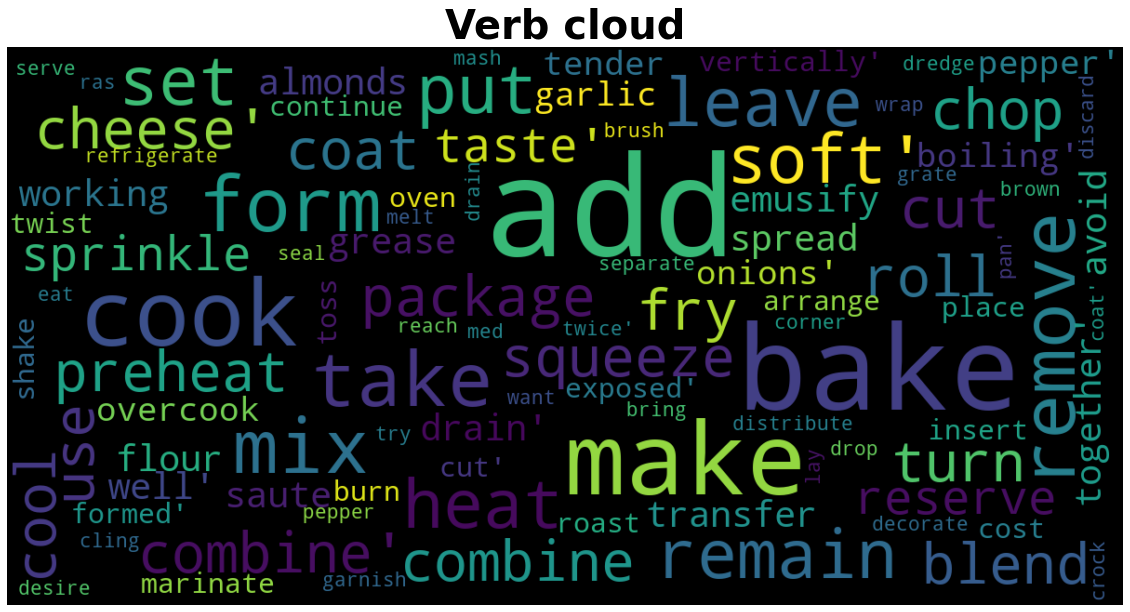

In [71]:
vlist = [w for step in [get_verbs(w) for w in tqdm(data.steps.apply(lemmatize_text),desc='Merging steps', position=0)] for w in step]
text = " ".join(vlist)
wc = WordCloud(background_color='black',max_font_size=50,scale=3).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Verb cloud",fontdict={'fontsize':40, 'fontweight':'bold', 'verticalalignment': 'top'})

In [80]:
sorted(wc.words_.items(), key = lambda x:x[1], reverse=True)[:20]

[('add', 1.0),
 ('bake', 0.6666666666666666),
 ('make', 0.4666666666666667),
 ('cook', 0.4),
 ('mix', 0.26666666666666666),
 ('take', 0.26666666666666666),
 ('form', 0.26666666666666666),
 ('remove', 0.26666666666666666),
 ('remain', 0.2),
 ('heat', 0.2),
 ('put', 0.2),
 ('leave', 0.2),
 ("soft'", 0.2),
 ('set', 0.2),
 ('fry', 0.13333333333333333),
 ('chop', 0.13333333333333333),
 ("combine'", 0.13333333333333333),
 ('blend', 0.13333333333333333),
 ('roll', 0.13333333333333333),
 ('cut', 0.13333333333333333)]